<a href="https://colab.research.google.com/github/sebasrosalesr/Sample-projects/blob/main/Face_detector_beta_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Face detector basic model with webcam

In [ ]:
# Define the base path to your image directory
base_path = '/content/drive/MyDrive/Deep Learning Projects/r_projects /f_project/train/'

# Ensure there are no leading or trailing whitespaces
base_path = base_path.strip()

# Ensure the base path ends with a single slash
if not base_path.endswith('/'):
    base_path += '/'

# Print the base path to verify
print(f"Base path: {base_path}")

Base path: /content/drive/MyDrive/Deep Learning Projects/r_projects /f_project/train/


In [ ]:
import pandas as pd
import os

# Load the CSV file
csv_file = '/content/drive/MyDrive/Deep Learning Projects/r_projects /f_project/image dir/file_list.csv'  # Replace with the path to your CSV file
data = pd.read_csv(csv_file)

# Use the correct base path
base_path = '/content/drive/MyDrive/Deep Learning Projects/r_projects /f_project/train/'

# Create the full image paths
data['image_path'] = data['id'].apply(lambda x: os.path.join(base_path, x.strip()))

# Print the first few image paths to verify
print(data['image_path'].head())
pd.DataFrame(data['image_path'].head())

0    /content/drive/MyDrive/Deep Learning Projects/...
1    /content/drive/MyDrive/Deep Learning Projects/...
2    /content/drive/MyDrive/Deep Learning Projects/...
3    /content/drive/MyDrive/Deep Learning Projects/...
4    /content/drive/MyDrive/Deep Learning Projects/...
Name: image_path, dtype: object


,image_path
0,/content/drive/MyDrive/Deep Learning Projects/...
1,/content/drive/MyDrive/Deep Learning Projects/...
2,/content/drive/MyDrive/Deep Learning Projects/...
3,/content/drive/MyDrive/Deep Learning Projects/...
4,/content/drive/MyDrive/Deep Learning Projects/...


In [ ]:
# Verify the existence of the files and collect valid paths
valid_image_paths = []
valid_labels = []

for image_path, label in zip(data['image_path'].values, data['label'].values):
    if os.path.exists(image_path):
        valid_image_paths.append(image_path)
        valid_labels.append(label)
    else:
        print(f"File not found: {image_path}")

# Display the number of valid and invalid paths
print(f"Valid image paths: {len(valid_image_paths)}")
print(f"Invalid image paths: {len(data) - len(valid_image_paths)}")

# Optionally, create a new DataFrame with valid paths only
valid_data = pd.DataFrame({'image_path': valid_image_paths, 'label': valid_labels})
print(valid_data.head())

Valid image paths: 44
Invalid image paths: 0
                                          image_path      label
0  /content/drive/MyDrive/Deep Learning Projects/...  Sebastian
1  /content/drive/MyDrive/Deep Learning Projects/...  Sebastian
2  /content/drive/MyDrive/Deep Learning Projects/...  Sebastian
3  /content/drive/MyDrive/Deep Learning Projects/...  Sebastian
4  /content/drive/MyDrive/Deep Learning Projects/...  Sebastian


In [ ]:
import pandas as pd
import os

# Load the CSV file
csv_file = '/content/drive/MyDrive/Deep Learning Projects/r_projects /f_project/image dir/file_list.csv'  # Replace with the path to your CSV file
data = pd.read_csv(csv_file)

# Correct the base path to your image directory
base_path = '/content/drive/MyDrive/Deep Learning Projects/r_projects /f_project/train/'
base_path = base_path.rstrip('/') + '/'  # Ensure the base path ends with a single slash

# Create the full image paths
data['image_path'] = data['id'].apply(lambda x: os.path.join(base_path, x.strip()))

# Verify the existence of the files and collect valid paths
valid_image_paths = []
valid_labels = []
for image_path, label in zip(data['image_path'].values, data['label'].values):
    if os.path.exists(image_path):
        valid_image_paths.append(image_path)
        valid_labels.append(label)
    else:
        print(f"File not found: {image_path}")

# Display the number of valid and invalid paths
print(f"Valid image paths: {len(valid_image_paths)}")
print(f"Invalid image paths: {len(data) - len(valid_image_paths)}")

# Create a new DataFrame with valid paths only
valid_data = pd.DataFrame({'image_path': valid_image_paths, 'label': valid_labels})
print(valid_data.head())

# Remove invalid rows from the original dataset
data = data[data['image_path'].isin(valid_image_paths)]
print(data.head())

Valid image paths: 44
Invalid image paths: 0
                                          image_path      label
0  /content/drive/MyDrive/Deep Learning Projects/...  Sebastian
1  /content/drive/MyDrive/Deep Learning Projects/...  Sebastian
2  /content/drive/MyDrive/Deep Learning Projects/...  Sebastian
3  /content/drive/MyDrive/Deep Learning Projects/...  Sebastian
4  /content/drive/MyDrive/Deep Learning Projects/...  Sebastian
                                         id      label  \
0  3bae0756-7382-44d4-8235-e710da8a2c05.jpg  Sebastian   
1                              IMG_1653.JPG  Sebastian   
2                         RenderedImage.jpg  Sebastian   
3                             IMG_9492.jpeg  Sebastian   
4                             IMG_2113.jpeg  Sebastian   

                                          image_path  
0  /content/drive/MyDrive/Deep Learning Projects/...  
1  /content/drive/MyDrive/Deep Learning Projects/...  
2  /content/drive/MyDrive/Deep Learning Projects/...  
3 

In [ ]:
# Display the number of valid and invalid paths
print(f"Valid image paths: {len(valid_image_paths)}")
print(f"Invalid image paths: {len(data) - len(valid_image_paths)}")

Valid image paths: 44
Invalid image paths: 0


In [ ]:
data['label']

0     Sebastian
1     Sebastian
2     Sebastian
3     Sebastian
4     Sebastian
5     Sebastian
6     Sebastian
7     Sebastian
8     Sebastian
9     Sebastian
10    Sebastian
11    Sebastian
12    Sebastian
13    Sebastian
14    Sebastian
15    Sebastian
16    Sebastian
17          Sol
18          Sol
19          Sol
20          Sol
21          Sol
22          Sol
23          Sol
24          Sol
25          Sol
26          Sol
27          Sol
28          Sol
29          Sol
30          Sol
31          Sol
32          Sol
33          Sol
34          Sol
35          Sol
36          Sol
37          Sol
38          Sol
39          Sol
40          Sol
41          Sol
42          Sol
43          Sol
Name: label, dtype: object

In [ ]:
import tensorflow as tf

# Function to load and preprocess an image
def load_image(image_path):
    image = tf.io.read_file(image_path)
    if tf.strings.regex_full_match(image_path, r".*\.(jpg|jpeg|JPG|JPEG)"):
        image = tf.image.decode_jpeg(image, channels=3)
    elif tf.strings.regex_full_match(image_path, r".*\.(png|PNG)"):
        image = tf.image.decode_png(image, channels=3)
    elif tf.strings.regex_full_match(image_path, r".*\.(gif|GIF)"):
        image = tf.image.decode_gif(image)
    elif tf.strings.regex_full_match(image_path, r".*\.(bmp|BMP)"):
        image = tf.image.decode_bmp(image)
    else:
        raise ValueError("Unsupported image format: " + image_path)

    image = tf.image.resize(image, [150, 150])
    image = image / 255.0  # Normalize to [0, 1]
    return image

def load_image_and_label(image_path, label):
    image = load_image(image_path)
    return image, label

# Convert labels to numeric
label_map = {label: idx for idx, label in enumerate(valid_data['label'].unique())}
valid_data['label'] = valid_data['label'].map(label_map)

# Convert to TensorFlow dataset
def load_image_and_label(image_path, label):
    image = load_image(image_path)
    return image, tf.convert_to_tensor(label, dtype=tf.int32)

# Create dataset from valid paths and labels
dataset = tf.data.Dataset.from_tensor_slices((valid_data['image_path'].values, valid_data['label'].values))
dataset = dataset.map(lambda x, y: tf.py_function(func=load_image_and_label, inp=[x, y], Tout=[tf.float32, tf.int32]), num_parallel_calls=tf.data.experimental.AUTOTUNE)

# Ensure shapes are set correctly after using py_function
def set_shapes(img, label):
    img.set_shape([150, 150, 3])
    label.set_shape([])
    return img, label

dataset = dataset.map(set_shapes, num_parallel_calls=tf.data.experimental.AUTOTUNE)

# Shuffle and batch the dataset
dataset = dataset.shuffle(buffer_size=1000).batch(32).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# Split the dataset into training and validation sets
train_size = int(0.8 * len(valid_data))
train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size)

# Displaying the label map for reference
print("Label map:", label_map)

Label map: {'Sebastian': 0, 'Sol': 1}


In [ ]:
# Verify the existence of the files and collect valid paths, excluding unsupported formats
supported_formats = ('.jpg', '.jpeg', '.png', '.gif', '.bmp')
valid_image_paths = []
valid_labels = []
for image_path, label in zip(data['image_path'].values, data['label'].values):
    if os.path.exists(image_path) and image_path.lower().endswith(supported_formats):
        valid_image_paths.append(image_path)
        valid_labels.append(label)
    else:
        print(f"File not found or unsupported format: {image_path}")

# Create a new DataFrame with valid paths only
valid_data = pd.DataFrame({'image_path': valid_image_paths, 'label': valid_labels})
print(f"Number of valid images: {len(valid_data)}")
print(valid_data.head())

# Ensure there are enough valid images
if len(valid_data) == 0:
    raise ValueError("No valid images found. Please check the dataset and file paths.")

# Function to load and preprocess an image
def load_image(image_path):
    image = tf.io.read_file(image_path)
    if tf.strings.regex_full_match(image_path, r".*\.(jpg|jpeg|JPG|JPEG)"):
        image = tf.image.decode_jpeg(image, channels=3)
    elif tf.strings.regex_full_match(image_path, r".*\.(png|PNG)"):
        image = tf.image.decode_png(image, channels=3)
    elif tf.strings.regex_full_match(image_path, r".*\.(gif|GIF)"):
        image = tf.image.decode_gif(image)
    elif tf.strings.regex_full_match(image_path, r".*\.(bmp|BMP)"):
        image = tf.image.decode_bmp(image)
    else:
        raise ValueError("Unsupported image format: " + image_path)

    image = tf.image.resize(image, [150, 150])
    image = image / 255.0  # Normalize to [0, 1]
    return image

def load_image_and_label(image_path, label):
    image = load_image(image_path)
    return image, tf.convert_to_tensor(label, dtype=tf.int32)  # Ensure label is int32

# Data augmentation function
def augment(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, lower=0.9, upper=1.1)
    return image, label

# Convert labels to numeric
label_map = {label: idx for idx, label in enumerate(valid_data['label'].unique())}
valid_data['label'] = valid_data['label'].map(label_map)

# Create dataset from valid paths and labels
def load_image_and_label(image_path, label):
    image = load_image(image_path)
    label = tf.cast(label, tf.int32)
    return image, label

# Create dataset from valid paths and labels
dataset = tf.data.Dataset.from_tensor_slices((valid_data['image_path'].values, valid_data['label'].values))
dataset = dataset.map(lambda x, y: tf.py_function(func=load_image_and_label, inp=[x, y], Tout=[tf.float32, tf.int32]), num_parallel_calls=tf.data.experimental.AUTOTUNE)

# Apply data augmentation
dataset = dataset.map(augment, num_parallel_calls=tf.data.experimental.AUTOTUNE)

# Ensure shapes are set correctly after using py_function
def set_shapes(img, label):
    img.set_shape([150, 150, 3])
    label.set_shape([])
    return img, label

dataset = dataset.map(set_shapes, num_parallel_calls=tf.data.experimental.AUTOTUNE)

# Shuffle and batch the dataset
dataset = dataset.shuffle(buffer_size=1000).batch(32).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# Check if the training dataset is empty
print(f"Training dataset size: {len(list(dataset))}")

if len(list(dataset)) == 0:
    raise ValueError("Training dataset is empty. Please check the dataset.")

# Displaying the label map for reference
print("Label map:", label_map)

# Build the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(len(label_map), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    dataset,  # Use all data for training
    epochs=80  # Increase the number of epochs
)

# Save the model
model.save('face_detection_model.h5')

Number of valid images: 44
                                          image_path      label
0  /content/drive/MyDrive/Deep Learning Projects/...  Sebastian
1  /content/drive/MyDrive/Deep Learning Projects/...  Sebastian
2  /content/drive/MyDrive/Deep Learning Projects/...  Sebastian
3  /content/drive/MyDrive/Deep Learning Projects/...  Sebastian
4  /content/drive/MyDrive/Deep Learning Projects/...  Sebastian
Training dataset size: 2
Label map: {'Sebastian': 0, 'Sol': 1}
Epoch 1/80
2/2 [==============================] - 6s 848ms/step - loss: 0.6522 - accuracy: 0.5909
Epoch 2/80
2/2 [==============================] - 4s 505ms/step - loss: 0.7777 - accuracy: 0.6364
Epoch 3/80
2/2 [==============================] - 3s 476ms/step - loss: 0.6640 - accuracy: 0.6591
Epoch 4/80
2/2 [==============================] - 3s 503ms/step - loss: 0.6799 - accuracy: 0.7273
Epoch 5/80
2/2 [==============================] - 5s 755ms/step - loss: 0.6545 - accuracy: 0.6136
Epoch 6/80
2/2 [====================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Save the model to an H5 file
model.save('/content/drive/MyDrive/Deep Learning Projects/r_projects /f_project/my_model.keras')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
import tensorflow as tf

#load the model
model = tf.keras.models.load_model('/content/drive/MyDrive/Deep Learning Projects/r_projects /f_project/my_model.keras')
print("Model loaded successfully.")

Model loaded successfully.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

model = Sequential([
    Input(shape=(150, 150, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.save('/content/drive/MyDrive/Deep Learning Projects/r_projects /f_project/s_model.h5')
print("Model saved successfully.")

Model saved successfully.


In [ ]:
# Manually select a few images for evaluation
evaluation_image_paths = valid_data['image_path'].values[:6]
evaluation_labels = valid_data['label'].values[:6]

# Function to preprocess evaluation images
def preprocess_evaluation_images(image_paths, labels):
    images = []
    for image_path in image_paths:
        image = load_image(image_path)
        images.append(image)
    images = tf.stack(images)  # Stack the images into a single tensor
    labels = tf.convert_to_tensor(labels, dtype=tf.int32)  # Convert labels to tensor
    return images, labels

evaluation_images, evaluation_labels = preprocess_evaluation_images(evaluation_image_paths, evaluation_labels)

# Evaluate the model
evaluation_results = model.evaluate(evaluation_images, evaluation_labels, verbose=2)
print(f"Evaluation results - Loss: {evaluation_results[0]}, Accuracy: {evaluation_results[1]}")

1/1 - 1s - loss: 0.6605 - accuracy: 0.6667 - 684ms/epoch - 684ms/step
Evaluation results - Loss: 0.6604894995689392, Accuracy: 0.6666666865348816


In [ ]:
# Function to make predictions on new images
def predict_image(image_path):
    image = load_image(image_path)
    image = tf.expand_dims(image, axis=0)  # Add batch dimension
    prediction = model.predict(image)
    predicted_label = tf.argmax(prediction, axis=1).numpy()[0]
    label_map_reverse = {v: k for k, v in label_map.items()}
    predicted_label_name = label_map_reverse[predicted_label]
    return predicted_label_name

# Example prediction
test_image_path = valid_data['image_path'].values[10]  # Use an image path from the dataset
predicted_label = predict_image(test_image_path)
print(f"Predicted label for the test image: {predicted_label}")

1/1 [==============================] - 0s 228ms/step
Predicted label for the test image: Sebastian


1/1 [==============================] - 0s 55ms/step


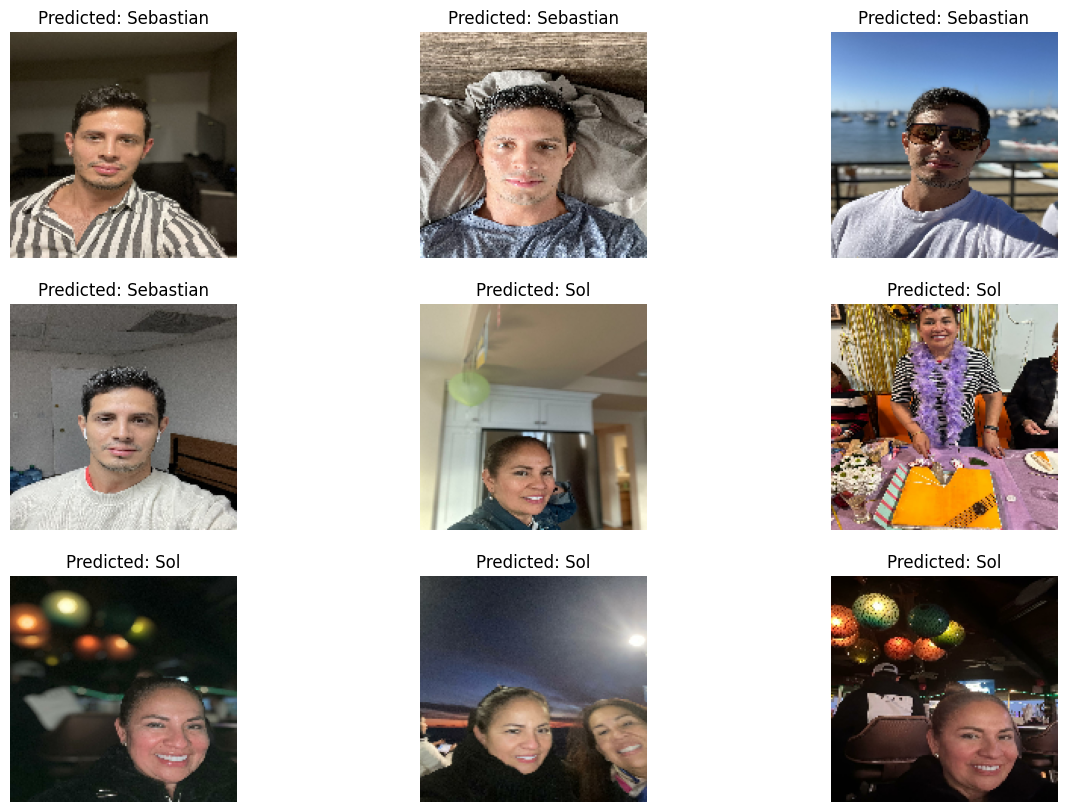

In [ ]:
import matplotlib.pyplot as plt

# Function to make predictions on new images
def predict_image(image_path):
    image = load_image(image_path)
    image = tf.expand_dims(image, axis=0)  # Add batch dimension
    prediction = model.predict(image)
    predicted_label = tf.argmax(prediction, axis=1).numpy()[0]
    label_map_reverse = {v: k for k, v in label_map.items()}
    predicted_label_name = label_map_reverse[predicted_label]
    return predicted_label_name, image

# Function to display images with their predictions
def display_images_with_predictions(image_paths):
    plt.figure(figsize=(15, 10))
    for i, image_path in enumerate(image_paths):
        predicted_label, image = predict_image(image_path)
        image = tf.squeeze(image)  # Remove batch dimension
        plt.subplot(3, 3, i+1)
        plt.imshow(image)
        plt.title(f"Predicted: {predicted_label}")
        plt.axis('off')
    plt.show()

# Example usage: display predictions for the first 9 images
display_images_with_predictions(valid_data['image_path'].values[13:22])

## Web cam detector

Play and capture to indetify

Model loaded successfully.
Label map: {'Sebastian': 0, 'Solyeye': 1}


<IPython.core.display.Javascript object>

Saved to photo.jpg


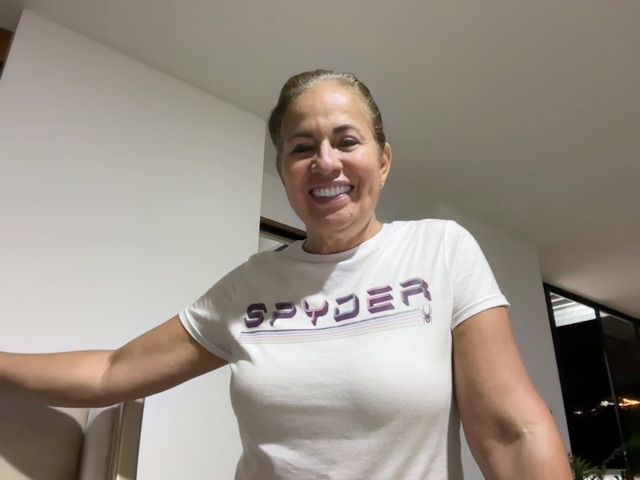

Preprocessing image: photo.jpg
Image shape after preprocessing: (1, 150, 150, 3)
1/1 [==============================] - 0s 84ms/step
Prediction raw output: [[0.06432657 0.9356734 ]]
Predicted label: Solyeye
Adding text: Predicted: Solyeye


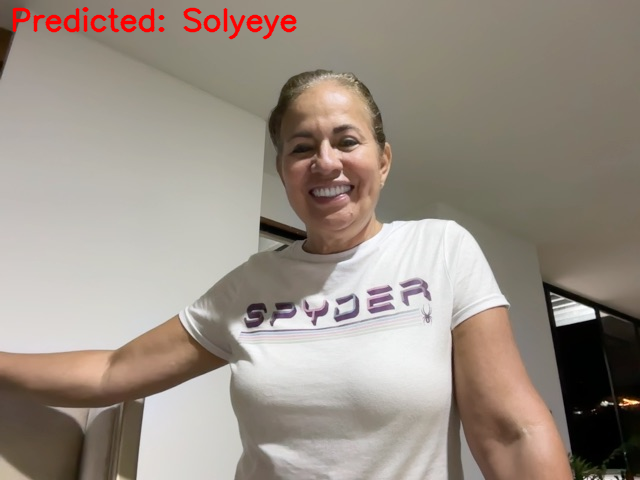

In [ ]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode
import tensorflow as tf
import numpy as np
from PIL import Image as PILImage
import cv2

# Function to capture photo
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for Capture to be clicked.
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Function to preprocess image
def preprocess_image(image_path):
    print(f"Preprocessing image: {image_path}")
    image = PILImage.open(image_path)
    image = image.resize((150, 150))
    image = np.array(image) / 255.0
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Function to predict the label of the image
def predict_image(image_path, model, label_map):
    image = preprocess_image(image_path)
    print(f"Image shape after preprocessing: {image.shape}")
    prediction = model.predict(image)
    print(f"Prediction raw output: {prediction}")
    predicted_label = np.argmax(prediction, axis=1)[0]
    label_map_reverse = {v: k for k, v in label_map.items()}
    predicted_label_name = label_map_reverse[predicted_label]
    return predicted_label_name

# Load your trained model
model = tf.keras.models.load_model('face_detection_model.h5')
print("Model loaded successfully.")

# Define your label map (make sure this matches your training labels)
label_map = {'Sebastian': 0, 'Solyeye': 1}
print(f"Label map: {label_map}")

try:
    # Capture photo
    filename = take_photo()
    print(f'Saved to {filename}')

    # Display the image
    display(PILImage.open(filename))

    # Predict the label of the image
    predicted_label = predict_image(filename, model, label_map)
    print(f'Predicted label: {predicted_label}')

    # Show the image with prediction
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    print(f"Adding text: Predicted: {predicted_label}")
    cv2.putText(img, f'Predicted: {predicted_label}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
    img_with_text = PILImage.fromarray(img)
    display(img_with_text)
except Exception as err:
    print(str(err))

## USING A PRE TRAINED MODEL


In [ ]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from sklearn.model_selection import train_test_split


#Load the CSV file
csv_file = '/content/drive/MyDrive/Deep Learning Projects/r_projects /f_project/image dir/file_list.csv'  # Replace with the path to your CSV file
data = pd.read_csv(csv_file)

# Correct the base path to your image directory
base_path = '/content/drive/MyDrive/Deep Learning Projects/r_projects /f_project/train/'
base_path = base_path.rstrip('/') + '/'  # Ensure the base path ends with a single slash

# Create the full image paths
data['image_path'] = data['id'].apply(lambda x: os.path.join(base_path, x.strip()))


In [ ]:

#Verify the existence of the files and collect valid paths
valid_image_paths = []
valid_labels = []
for image_path, label in zip(data['image_path'].values, data['label'].values):
    if os.path.exists(image_path):
        valid_image_paths.append(image_path)
        valid_labels.append(label)
    else:
        print(f"File not found: {image_path}")

# Display the number of valid and invalid paths
print(f"Valid image paths: {len(valid_image_paths)}")
print(f"Invalid image paths: {len(data) - len(valid_image_paths)}")

Valid image paths: 44
Invalid image paths: 0


In [ ]:
# Create a new DataFrame with valid paths only
valid_data = pd.DataFrame({'image_path': valid_image_paths, 'label': valid_labels})
print(valid_data.head())

# Function to load and preprocess an image
def load_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image, channels=3)
    image = tf.image.resize(image, [150, 150])
    image = image / 255.0  # Normalize to [0, 1]
    return image

def load_image_and_label(image_path, label):
    image = load_image(image_path)
    label = tf.convert_to_tensor(label, dtype=tf.int32)
    return image, label

# Convert labels to numeric
label_map = {label: idx for idx, label in enumerate(valid_data['label'].unique())}
valid_data['label'] = valid_data['label'].map(label_map).astype('int32')

                                          image_path      label
0  /content/drive/MyDrive/Deep Learning Projects/...  Sebastian
1  /content/drive/MyDrive/Deep Learning Projects/...  Sebastian
2  /content/drive/MyDrive/Deep Learning Projects/...  Sebastian
3  /content/drive/MyDrive/Deep Learning Projects/...  Sebastian
4  /content/drive/MyDrive/Deep Learning Projects/...  Sebastian


In [ ]:
# Split the data into training and validation sets
train_data, val_data = train_test_split(valid_data, test_size=0.2, stratify=valid_data['label'])

# Create datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_data['image_path'].values, train_data['label'].values))
train_dataset = train_dataset.map(lambda x, y: tf.py_function(func=load_image_and_label, inp=[x, y], Tout=[tf.float32, tf.int32]), num_parallel_calls=tf.data.experimental.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices((val_data['image_path'].values, val_data['label'].values))
val_dataset = val_dataset.map(lambda x, y: tf.py_function(func=load_image_and_label, inp=[x, y], Tout=[tf.float32, tf.int32]), num_parallel_calls=tf.data.experimental.AUTOTUNE)


In [ ]:
# Apply data augmentation to the training dataset
def augment(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, lower=0.9, upper=1.1)
    return image, label

train_dataset = train_dataset.map(augment, num_parallel_calls=tf.data.experimental.AUTOTUNE)

# Ensure shapes are set correctly after using py_function
def set_shapes(img, label):
    img.set_shape([150, 150, 3])
    label.set_shape([])
    return img, label

train_dataset = train_dataset.map(set_shapes, num_parallel_calls=tf.data.experimental.AUTOTUNE)
val_dataset = val_dataset.map(set_shapes, num_parallel_calls=tf.data.experimental.AUTOTUNE)

# Shuffle and batch the datasets
train_dataset = train_dataset.shuffle(buffer_size=1000).batch(32).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)


In [ ]:
# Load the VGG16 model pre-trained on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Add new layers for your specific task
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(len(label_map), activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=30  # Increase the number of epochs if needed
)

Epoch 1/30
2/2 [==============================] - 15s 3s/step - loss: 0.7750 - accuracy: 0.6286 - val_loss: 0.9565 - val_accuracy: 0.3333
Epoch 2/30
2/2 [==============================] - 13s 4s/step - loss: 0.9527 - accuracy: 0.4000 - val_loss: 0.6445 - val_accuracy: 0.5556
Epoch 3/30
2/2 [==============================] - 14s 6s/step - loss: 0.5598 - accuracy: 0.7714 - val_loss: 0.7157 - val_accuracy: 0.6667
Epoch 4/30
2/2 [==============================] - 13s 6s/step - loss: 0.6641 - accuracy: 0.6000 - val_loss: 0.8871 - val_accuracy: 0.6667
Epoch 5/30
2/2 [==============================] - 13s 6s/step - loss: 0.8029 - accuracy: 0.6000 - val_loss: 0.7229 - val_accuracy: 0.6667
Epoch 6/30
2/2 [==============================] - 11s 3s/step - loss: 0.5759 - accuracy: 0.6000 - val_loss: 0.5690 - val_accuracy: 0.6667
Epoch 7/30
2/2 [==============================] - 15s 4s/step - loss: 0.4079 - accuracy: 0.8857 - val_loss: 0.5795 - val_accuracy: 0.6667
Epoch 8/30
2/2 [==================

In [ ]:
# Save the model
model.save('VGG16.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(val_dataset)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

1/1 [==============================] - 2s 2s/step - loss: 0.6980 - accuracy: 0.7778
Validation Loss: 0.6980270147323608
Validation Accuracy: 0.7777777910232544


In [ ]:
# Function to make predictions
def predict(image_path):
    image = load_image(image_path)
    image = tf.expand_dims(image, axis=0)  # Add batch dimension
    predictions = model.predict(image)
    predicted_label = list(label_map.keys())[tf.argmax(predictions[0])]
    return predicted_label

In [ ]:
# Test the model with a sample image
sample_image_path = '/content/drive/MyDrive/Deep Learning Projects/r_projects /f_project/validation/WhatsApp Image 2024-07-19 at 20.51.49.jpeg'  # Replace with the path to a sample image
predicted_label = predict(sample_image_path)
print(f'Predicted Label: {predicted_label}')

1/1 [==============================] - 0s 385ms/step
Predicted Label: Sol
